### Using pre-trained model with spacy

In [6]:
import numpy as np
import pandas as pd

In [7]:
sentences = [
    'Molly ate a donut',
    'Molly ate a fish',
    'Jen consumed a carp',
    'Lenny fears the lions'
]

print('\n'.join(sentences))

Molly ate a donut
Molly ate a fish
Jen consumed a carp
Lenny fears the lions


In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(binary=True)
matrix = vectorizer.fit_transform(sentences)
counts = pd.DataFrame(
    matrix.toarray(),
    index=sentences,
    columns=vectorizer.get_feature_names_out())
counts

,ate,carp,consumed,donut,fears,fish,jen,lenny,lions,molly,the
Molly ate a donut,1,0,0,1,0,0,0,0,0,1,0
Molly ate a fish,1,0,0,0,0,1,0,0,0,1,0
Jen consumed a carp,0,1,1,0,0,0,1,0,0,0,0
Lenny fears the lions,0,0,0,0,1,0,0,1,1,0,1


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarities using the word counts
similarities = cosine_similarity(matrix)

# Make a fancy colored dataframe about it
pd.DataFrame(similarities,
             index=sentences,
             columns=sentences) \
            .style \
            .background_gradient(axis=None)

,Molly ate a donut,Molly ate a fish,Jen consumed a carp,Lenny fears the lions
Molly ate a donut,1.000000,0.666667,0.000000,0.000000
Molly ate a fish,0.666667,1.000000,0.000000,0.000000
Jen consumed a carp,0.000000,0.000000,1.000000,0.000000
Lenny fears the lions,0.000000,0.000000,0.000000,1.000000


In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [16]:
nlp('cat').vector

array([-1.3749216 , -0.9209707 , -0.48585108,  0.7449953 , -0.04045266,
        0.40948564,  1.2951561 ,  1.480995  ,  0.48480064, -0.7330386 ,
        2.462772  , -0.9649264 , -0.37727293,  0.08553091, -0.24743515,
        1.6335745 , -0.06138834, -1.5028492 ,  0.967414  ,  0.63307035,
       -0.72185993,  0.6233178 , -1.1602921 , -0.6722332 ,  0.9362452 ,
        1.0436772 ,  0.3563193 ,  0.9629261 , -0.8357587 ,  0.449831  ,
       -0.6676395 , -0.31429762,  1.9747405 , -0.38430327, -0.44635606,
       -2.0205777 ,  0.07270992,  1.4437965 ,  0.5954057 ,  0.31014535,
       -1.2809043 , -0.60996306, -0.6490139 ,  0.72085637, -1.1413931 ,
       -1.5718629 , -0.5458978 ,  1.5909092 ,  0.38662726,  0.47634625,
        0.70607305,  0.91097486,  0.34076473,  0.32807004, -0.34836677,
        0.07606278,  1.0374578 ,  0.24974427,  0.21037751, -0.10116711,
       -0.97328275, -0.95685375, -0.7718992 , -0.6154634 , -0.19992816,
       -0.19895095, -0.4496122 ,  0.28037518,  0.5823548 , -1.21

In [17]:
nlp('Some people have never eaten a taco').vector

array([-0.10028917, -0.37845677,  0.06776784,  0.55306256, -0.10731608,
       -0.30477595, -0.0895832 ,  0.03440759, -0.03828333,  0.7121062 ,
       -0.40316275,  0.03046582, -0.1585456 ,  0.15327282, -0.24506907,
        0.41505983,  0.4613986 ,  0.00247969, -0.31314042, -0.08333338,
       -0.34550363, -0.3589215 , -0.06911438, -0.880454  ,  0.7141748 ,
       -0.42672196,  0.16293685,  0.81257385, -0.03947157,  0.28672293,
        0.02963316, -0.0817601 ,  0.46841002, -0.6258934 , -0.37701684,
       -0.57715315, -0.09427088, -0.08977167,  0.02473315,  0.5861517 ,
       -0.04703555,  0.44248915, -0.27084973,  0.3505799 ,  0.31867   ,
        0.51258415, -0.26269215,  0.5437421 ,  0.78895104, -0.11439297,
       -0.19308007, -0.504414  , -0.3273931 ,  0.09130011,  0.4647537 ,
        0.01094646,  0.06151894, -0.03339434, -0.5313671 , -0.28571603,
        0.7387715 ,  0.0072313 ,  0.4475791 ,  0.28029954,  0.60857075,
       -0.688815  ,  0.26193497, -0.64164543,  0.70690316,  0.20

In [18]:
# We aren't printing this because it's 3 * 300 = 900 numbers
vectors = [nlp(sentence).vector for sentence in sentences]

# Print out some notes about it
print("We have", len(vectors), "different vectors")
print("And the first one has", len(vectors[0]), "measurements")
print("And the second one has", len(vectors[1]), "measurements")
print("And the third one has", len(vectors[2]), "measurements")
print("And the fourth one has", len(vectors[3]), "measurements")

We have 4 different vectors
And the first one has 96 measurements
And the second one has 96 measurements
And the third one has 96 measurements
And the fourth one has 96 measurements


In [19]:
# Compute similarities
similarities = cosine_similarity(vectors)

# Turn into a dataframe
pd.DataFrame(similarities,
            index=sentences,
            columns=sentences) \
            .style \
            .background_gradient(axis=None)

,Molly ate a donut,Molly ate a fish,Jen consumed a carp,Lenny fears the lions
Molly ate a donut,1.000000,0.815810,0.542203,0.145990
Molly ate a fish,0.815810,1.000000,0.680518,0.302910
Jen consumed a carp,0.542203,0.680518,1.000000,0.392180
Lenny fears the lions,0.145990,0.302910,0.392180,1.000000


In [20]:
# Here are our sentences
sentences = [
    'Veronica hates mustard. I hate you.',
    'Veronica loves ketchup',
    'Joseph hates ketchup',
]

# Turn into vectors
vectors = [nlp(sentence).vector for sentence in sentences]

# Compute similarities
similarities = cosine_similarity(vectors)

# Turn into a dataframe
pd.DataFrame(similarities,
            index=sentences,
            columns=sentences) \
            .style \
            .background_gradient(axis=None)

,Veronica hates mustard. I hate you.,Veronica loves ketchup,Joseph hates ketchup
Veronica hates mustard. I hate you.,1.000000,0.476955,0.564298
Veronica loves ketchup,0.476955,1.000000,0.813367
Joseph hates ketchup,0.564298,0.813367,1.000000


## Training New Model with Gensim

In [21]:
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases #, ENGLISH_CONNECTOR_WORDS
from gensim.models import Word2Vec

import pandas as pd

In [73]:
Corpus = '''As long as the child does not have enough strength to wear sandals (the wooden ones for girls and women are called hubkab, the leather ones for boys and`men are tailed watje), it runs' about barefooted. Because the watje are considerably lighter to wear than the kubkab, very, small girls initially are made to walk on the former until they have acquired the necessary skill to wear the ku*bkeib forever. Neither children nor adults of both sexes wear stockings; only more aristocratic ladies use them now and then when riding, as custom requires one to cover the ankles.
Already at the age of two to four months, two or three slaves, besides the wet nurses, were allotted to the child by our father. From then on they remained its property. The older it grew, the more slaves it received for its personal attendance. If one of them died, our father replaced him, or gave an appropriate sum of money. Up to 'a certain age, little girls wear boys' caps in the house.
Until his seventh year each prince at home stays among the women. At this age the mosaic rite [circumcision] is performed on him. Ceremonies of course play an important role on this occasion, the closing of which, after the child's recovery, forms a peculiar festivity, in which all dignitaries and high officials are allowed to take part. This deed, if in any way possible, was enacted in the country and in the presence of our father. A public entertainment, usually lasting for three days, also accompanied this.
 
From this time onwards, every boy received a quiet mare of his own. His escort could take their mounts from the stables, where a couple of hundred Arabian horses were standing. In this way the boy, at a very early age, learns to ride well and acquires a very outstanding skill and nimbleness, which only a trained circus rider is otherwise credited with. Since we had neither a true saddle nor stirrup, it required of course much more dexterity to gain a firm seat than in this country. Our father followed a characteristic custom when his sons ran into some mishap while out riding. In that case not only they themselves but also their escort could expect punishment. For our father assumed that the latter, with the tight warrants and instructions which he had conferred on them, must have behaved much too indulgently towards the princes.
Not one of us was spoiled in any way. My father's high sense of justice and unparalleled generosity was combined with an equally firm consistency which did not know any weakness. All of us had to obey our teachers and educators on the strength of their word [be they Arabs, Abyssinians or simple negroes). If occasionally we complained to our father, we certainly left his presence in tears or shame for our behavior. This severity taught us the reverence due to such people, and with increasing age the appreciation of how deep our moral indebtedness to them was also grew.
The nurses, even if they had served as such for a very short time, were partic-ularly honoured and enjoyed special esteem for the remainder of their life. By birth they were always slaves, but as a rule they were freed in reward of their fidelity and devotion. The black wet nurses especially distinguished themselves by extraordinary fidelity and attachment. Even the most cautious mother might in all confidence leave her child with the wet nurse, who usually considered herself as its second mother and acted accordingly. How the lack of interest and the heartlessness of the wet nurses in these parts stand out in stark contrast with this! Often enough have I felt myself forced to give, on a public walkway, a good talking to such a character, totally unknown to me, for her brutal treatment of the little thing entrusted to her. This contrast between the wet nurses of these parts and our Arab ones may possibly be explained by the fact that the former are forced by their poverty alone to entrust their own beloved child to complete strangers under much sacrifice. Only for money's sake they serve masters; whether the child to nurse is called Tom or Dick is indifferent to them; their thoughts and feelings naturally linger with their own child. And which mother would hold this against her!
How very different is a black nurse's attitude towards her mistress's child entrusted to her. For years she is in the latter's service, she may even have been born in her house; it then is understandable that she does not have many private interests, that she makes those of her masters her own. Moreover, there is the most important fact that a black wet nurse only very rarely, if ever, is required to part with her child, but may quietly retain it. The wet nurse's child then receives the same nourishment as its little master or mistress, the same milk soup, part of the same fowl, etc.; the same goes for the bath, and the used dresses fall no
 
less to its lot. When its mother stops serving as a wet nurse, her child continues to be the playmate of her second foster-child. Though remaining a slave, it is always preferred to the rest of the slaves, and only bad people offend against this attachment to the foster-brother.
The black wet nurses, however, have one very bad habit. They know how to tell the little children of three to five years old very dreadful stories and fairytales. Partly to amuse them, partly also to keep them quiet. The lion (simba), the leopard (tshui), the elephant (tembo), and the numerous witches (watchawi) occupy of course the first place in these often also for adults horrifying fables.
On the whole, rearing a child in the south is unquestionably much easier than here in the north: above all, the everlasting colds and everything they, usually entail are rare. Notwithstanding all indolence, children there are very independent and adroit, for they are allowed to play and jump freer and more unconstrained (both in space and in dress) to their heart's content. Though gymnastic exercises are completely unknown, it is no rarity that a boy of ten to twelve in playing takes a stiff run and leaps over one or even two horses. High jumping in general plays an important role, and everybody strives as much as he can to surpass the other.
Swimming in the sea was practiced no less eagerly, and everybody taught himself without any guidance. Shooting too began early and was pursued with great passion. Mock-fights were extraordinarily favored from youth onward many an hour was devoted to them. Though the boys went about armed to the teeth and carried as much powder and lead as grown-ups, one hardly ever heard of an accident caused by imprudence.
Up to a certain age only, the young princes, as already mentioned above, lived in their father's house. Then a house of their own was assigned to each to keep independently, as a rule with their mother if she was still alive. As maintenance he was granted by our father a certain monthly allowance, and then he had to "cut his coat according to his cloth," which was certainly matching the needs. At marriage, at an increase to the family, or also for exceptional conduct, he might count on an extra allowance, but in no other case. Only when our father's ships arrived annually with the new purchases, did all my brothers and sisters living outside the paternal house come with their families to receive each the share belonging to him, whether he needed it or not. If any one of them had the great misfortune of spending more than what his allowance brought in, it was never made easy for him to pay his debts; nothing was more hateful to our father, and the one who had brought this disgrace to himself was very much on his guard not to incur the same a second time.
If a war broke out, as unfortunately was so often the case in Oman, all the princes, the half-grown included, had to take the field too and to take part in the fight like any common man. On the whole, discipline was strict, but it only raised the respect and reverence of the sons for their father. As a child I often saw with astonishment how my elder brother, anticipating the slaves, hurried to put, in readiness the sandals my father had left at the door of his room. The
 
elder brothers appeared also in the paternal house several times a day, as soon as our father was present, and then took part in the meals.
There is but very little to say about the education of a princess; the first years it is the same as that of her brothers, with the exception that the latter at their seventh year obtain a much greater freedom outside the house. The only thing deserving mention at a princess's birth is that, in accordance with the hairdress in our country, a broad comb, generally of silver, is placed under the back of the newborn to give it a flat shape for later age. When a Princess is married to one of her cousins, who to be sure are more numerous in Oman than in Zanzibar, she of course leaves the paternal house in exchange for that of her husband. The former, however, the sole and real bulwark against all hardships of life, remains always open as a place to live. But if she prefers, she can also go and live with a brother. Every sister has her favourite brother, and vice versa; in joy and sorrow these two stick together and support each other by word and deed. As praiseworthy and, for those concerned, as much a blessing as this habit was in such a numerous family circle as ours, it understandably created many jealousies among brothers and sisters, and it often required a strong character to overcome all these.
Often such a loving sister had to intercede with our father for some imprudence of her favourite brother, for he liked to favour his daughters and rarely left their requests unheard. To his elder daughters in particular he was extraordinarily obliging; he usually went to meet them from afar and had them seated by his side on the sofa, while the grown-up sons and we little people stood respectfully before him.
Schooling (mdarse) is of very little importance for the Oriental in general and consequently for us too. In Europe school is at the center of State and Church, without distinction for prince and citizen; for both the formation of his character and his prospects for the future, the individual depends essentially upon it for his success. But in the Orient the mdarse is altogether a matter of secondary importance; for a good many people it does not exist at all. But before engaging in further discussions, I wish to say something about what we called school in our house.
At the age of six to seven, all my brothers and sisters, boys as well as girls, had,to enter the mdarse. We girls were only required to learn to read, the boys to read and write. For teaching there was at both Bet il•Mtoni and Bet it Sahel only one lady teacher, whom our father had sent for from Oman. When the teacher fell ill and was confined to her bed, there was always great joy among us; no replacement could be procured for her, and so we had holidays.
There was no specific schoolroom, lessons took place in an open gallery, to which pigeons, parrots, peacocks and ricebirds found free entrance. From there we also had a free view of the courtyard and were able to amuse ourselves with watching its busy life down there. The furniture of the schoolroom consisted of a single, immense mat only. Our school equipment was equally simple: we only needed a Kuran with its stand (marfa), a small inkstand with ink, a bamboo
 
quill, and a well-bleached shoulder-blade of a camel. The latter is the substitute for the slate; writing with ink on this is quite easy, and the nerves are certainly less assailed than at the scratching on the slate. Our slaves usually took care of wiping off the blades.
The first thing we had to learn, exactly as is done here, was the very complicated Arabic alphabet. Then, for want of any other school-book, we started reading the Kuran with which, as mentioned above, writing lessons were connected for the boys. When one was able to read a little, one joined the others who all read in a chorus and mostly very loudly. But that was all, for what is read and learned is never explained. Hence there was at most only one among thousands who understood word by word all the meanings and precepts of the Holy Script of the Muslims and who was able to explain them, though probably, eighty out of one hundred had learned half of it by heart. Reflecting upon the Holy Script was even considered irreligious and unauthorized; people should simply believe what they were taught, and this maxim was rigorously carried out.
Having enjoyed some fruit, we had to assemble at seven o'clock in the morning on our mat, which had been rolled up during the night and was now swept clean, and had to await the arrival of our severe lady teacher. Until she arrived, we whiled away the time to our heart's content with wrestling, boxing, jumping, climbing the railings which was life endangering, and other favourite amusements of the children's world. We set a watch at the bend of the gallery, who by simulated coughing announced the teacher's arrival from afar. In no time we were all sitting on the mat, an image of the greatest innocence, and only when her steps came near, did we rebound like India rubber balls, to shake hands respectfully with the dreaded one and to wish her good morning. She always carried the detested bamboo cane in one hand and a large brass inkstand in the other. We stood in file before her until she had taken her seat; only then were we permitted to follow this example. All of us sat cross-legged oh the mat, flocked together in a circle around the teacher.
She now would begin to recite the first sura of the Kuran, the Muslim Lord's prayer as it were. We prayed in chorus after her and concluded with the well-known Amin (not Amen). Then we repeated what we had learned the day before, and after that We were given a new piece for reading or writing. Lessons regularly lasted until about nine o'clock, and then, after breakfast, again till about noon, the time of the second prayer.
Each of us was allowed to bring some of his slaves to school to take part in the lessons; they sat at some distance behind us, while we grouped ourselves as we pleased, for there were neither fixed places for us or division in different forms. People had not the faintest notion of school reports, which a few times every year occasion feverish excitement in this country. If someone made particularly good or bad progress, distinguished himself particularly through good or bad behaviour, this usually was reported orally to the respective mothers and to our father. From the latter the lady teacher had the explicit order to punish us
 
severely, if there was any cause. And our great wildness obliged her to use 'the evil bamboo cane.
Besides reading and writing, we were taught a little arithmetic, numbering up to one hundred in writing and up to one thousand orally; what is beyond that is believed to be from the evil one. With grammar and orthography not much pain was taken, and the rather complicated Ilnahu [grammar, from Arabic al-nabw] was only acquired by much reading over the years. At home I never heard of such sciences as history, geography, physics, mathematics or how they are all named let alone that I learned them. It was only in this country [i.e., Germany] that I had the pleasure to become acquainted with all these fields of knowledge. But it will remain an open question to me whether, with the little wisdom laboriously acquired here, I am now better off than the others over there. That I have never been more deceived and swindled than in the time of my greatest knowledge, this is certain. Oh you happy people at home! Not even in your dreams do you surmise all that is connected with holy civilization!'''


In [74]:
Corpus_list = [x.replace("\n"," ").replace(".", "") for x in Corpus.split(". ")]
Corpus_list = [simple_preprocess(x, deacc=True, max_len=50, min_len=1) for x in Corpus_list]
print(Corpus_list[0:5])

[['as', 'long', 'as', 'the', 'child', 'does', 'not', 'have', 'enough', 'strength', 'to', 'wear', 'sandals', 'the', 'wooden', 'ones', 'for', 'girls', 'and', 'women', 'are', 'called', 'hubkab', 'the', 'leather', 'ones', 'for', 'boys', 'and', 'men', 'are', 'tailed', 'watje', 'it', 'runs', 'about', 'barefooted'], ['because', 'the', 'watje', 'are', 'considerably', 'lighter', 'to', 'wear', 'than', 'the', 'kubkab', 'very', 'small', 'girls', 'initially', 'are', 'made', 'to', 'walk', 'on', 'the', 'former', 'until', 'they', 'have', 'acquired', 'the', 'necessary', 'skill', 'to', 'wear', 'the', 'ku', 'bkeib', 'forever'], ['neither', 'children', 'nor', 'adults', 'of', 'both', 'sexes', 'wear', 'stockings', 'only', 'more', 'aristocratic', 'ladies', 'use', 'them', 'now', 'and', 'then', 'when', 'riding', 'as', 'custom', 'requires', 'one', 'to', 'cover', 'the', 'ankles', 'already', 'at', 'the', 'age', 'of', 'two', 'to', 'four', 'months', 'two', 'or', 'three', 'slaves', 'besides', 'the', 'wet', 'nurses',

In [88]:
model = Word2Vec(sentences = Corpus_list, min_count = 1, vector_size = 600, workers = 3, window = 10, epochs=10)

In [76]:
print(list(model.wv.key_to_index.keys())[0:50])

['the', 'to', 'and', 'of', 'in', 'a', 'for', 'was', 'as', 'with', 'is', 'had', 'her', 'our', 'we', 'it', 'this', 'at', 'all', 'only', 'one', 'that', 'his', 'father', 'their', 'on', 'were', 's', 'very', 'or', 'they', 'child', 'by', 'are', 'them', 'she', 'which', 'not', 'there', 'from', 'if', 'then', 'much', 'an', 'but', 'us', 'little', 'also', 'wet', 'house']


In [77]:
model.wv["world"]

array([-1.27028730e-02, -5.72029352e-02,  2.37032905e-01, -8.07354823e-02,
       -2.29824763e-02,  8.05969909e-02, -1.89706478e-02,  4.98451032e-02,
        3.01215470e-01,  1.51626408e-01, -3.83543856e-02, -1.19648844e-01,
        2.89292354e-02, -5.53202396e-03, -1.92405850e-01, -1.46671459e-01,
        9.24257096e-03,  1.57159507e-01, -1.17915697e-01,  5.84941171e-02,
       -2.11658314e-01, -5.32190315e-02, -5.67205846e-02, -1.88206911e-01,
        1.08024284e-01, -6.20979182e-02,  5.75651526e-02, -4.83128056e-02,
        2.04337955e-01, -4.00763750e-02,  6.03067949e-02,  6.41198605e-02,
        5.48646376e-02, -2.64608145e-01,  1.82702705e-01, -1.98629782e-01,
        1.16886906e-01, -2.88395196e-01,  2.46613503e-01,  1.21313706e-01,
       -2.29239762e-02, -4.34392877e-02,  1.23536289e-02,  1.91128373e-01,
        1.07914709e-01,  4.35465872e-02,  2.93971356e-02,  2.68703401e-02,
       -1.07217237e-01,  7.21569136e-02, -1.15150206e-01, -2.19705611e-01,
       -4.59002480e-02,  

In [78]:
print(model.wv.most_similar("child"))
print(model.wv.most_similar("ladies"))

[('nurse', 0.8783789873123169), ('masters', 0.8145874738693237), ('playmate', 0.7832228541374207), ('continues', 0.7659434676170349), ('serve', 0.7624726295471191), ('tom', 0.7527452707290649), ('dick', 0.7428554892539978), ('indifferent', 0.7320852875709534), ('sake', 0.7241951823234558), ('entrust', 0.7180013656616211)]
[('aristocratic', 0.9908111095428467), ('stockings', 0.9275569319725037), ('sexes', 0.8402096629142761), ('use', 0.8322800993919373), ('riding', 0.7667556405067444), ('now', 0.7210107445716858), ('more', 0.6685670614242554), ('custom', 0.6627979874610901), ('when', 0.6535467505455017), ('requires', 0.6477257609367371)]


### Visualization with t-SNE

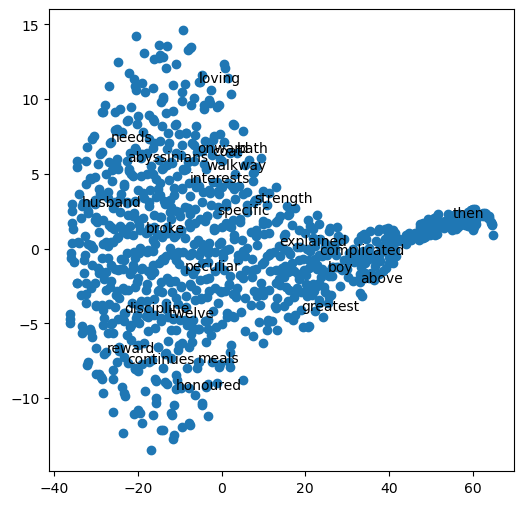

In [89]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(6, 6))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

x_vals, y_vals, labels = reduce_dimensions(model)
plot_with_matplotlib(x_vals, y_vals, labels)

In [87]:
for i in range(20):

    model = Word2Vec(sentences = Corpus_list, min_count = 1, vector_size = 600, workers = 3, window = 10, epochs=i+1)

    def reduce_dimensions(model):
        num_dimensions = 2  # final num dimensions (2D, 3D, etc)

        # extract the words & their vectors, as numpy arrays
        vectors = np.asarray(model.wv.vectors)
        labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

        # reduce using t-SNE
        tsne = TSNE(n_components=num_dimensions, random_state=0)
        vectors = tsne.fit_transform(vectors)

        x_vals = [v[0] for v in vectors]
        y_vals = [v[1] for v in vectors]
        return x_vals, y_vals, labels

    def plot_with_matplotlib(x_vals, y_vals, labels):
        import matplotlib.pyplot as plt
        import random

        random.seed(0)

        plt.figure(figsize=(6, 6))
        plt.scatter(x_vals, y_vals)

        #
        # Label randomly subsampled 25 data points
        #
        indices = list(range(len(labels)))
        selected_indices = random.sample(indices, 25)
        for j in selected_indices:
            plt.annotate(labels[j], (x_vals[j], y_vals[j]))
        plt.savefig("training_images/epoch_" + str(i+1))
        plt.close()

    x_vals, y_vals, labels = reduce_dimensions(model)
    plot_with_matplotlib(x_vals, y_vals, labels)